In [2]:
import pandas as pd 
from statsmodels.formula.api import ols

In [3]:
child = pd.read_csv('child.csv')

In [4]:
child.head()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
0,0.374160,0.172671,0.141907,-0.328216,-0.110303,-0.279034
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167
2,-0.097728,-0.074460,-0.390141,-0.217184,0.280301,-0.328063
3,0.015935,-0.004427,-0.408080,0.046223,-0.263479,-1.005119
4,-0.275385,-0.675239,-0.277778,-0.891045,0.226581,0.489478


In [5]:
ols('Aggression~Television', child).fit().summary()
# skew 0 근처이면 추세선에서 위아래로 고르게 데이터가 퍼져있음 -> OK
# - 값이면 negative skew, + 값이면 positive skew
# 그래프가 뾰족하게 쏫아있을 수록 Kurtosis(첨도)가 높음 -> 정규분포는 3, 3근처면 정규분포와 비슷한 형태
# Durbin-Watson: 쉽게 말해 어떤 x에서든 비슷한 정도로 y를 맞출 수 있음 
# Cond. No. :입력에 얼마나 민감한지 -> 조건수 크면 데이터가 조금만 달라져도 결과에 큰 차이, 작을수록 좋음 (통상 30이하)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.11
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.98e-05
Time:                        10:10:38   Log-Likelihood:                -175.93
No. Observations:                 666   AIC:                             355.9
Df Residuals:                     664   BIC:                             364.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.012     -0.041      0.967      -0.025       0.024
Television     0.1634      0.040      4.137      0.000       0.086       0.241
==============================================================================
Omnibus:                       24.471   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.038
Skew:                           0.108   Prob(JB):                     2.50e-13
Kurtosis:                       4.430   Cond. No.                         3.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중공선성  multicollinearity 
**몹시중요**
- 독립변수들이 서로 예측가능할 경우 
- 조건수(Cond.No.)가 커짐 
- 데이터나 변수의 변화에 따라 추정된 계수가 크게 달라짐 

- 다중공선성 (독립변수끼리 예측) -> 계수측정이 불안정 -> 조건수 증가
- 아래 예제 
    - 같은 데이터가 두번 들어갔으니 다른 수는 정상인데 Cond.No.가 미친듯이 높음 (+warning도 뜸), 모든 계산이 엉터리  

In [8]:
child['TV2']= child['Television']
ols('Aggression~TV2+Television', child).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.11
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.98e-05
Time:                        10:45:41   Log-Likelihood:                -175.93
No. Observations:                 666   AIC:                             355.9
Df Residuals:                     664   BIC:                             364.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.012     -0.041      0.967      -0.025       0.024
TV2            0.0817      0.020      4.137      0.000       0.043       0.120
Television     0.0817      0.020      4.137      0.000       0.043       0.120
==============================================================================
Omnibus:                       24.471   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.038
Skew:                           0.108   Prob(JB):                     2.50e-13
Kurtosis:                       4.430   Cond. No.                     2.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 변수선택 
## 정규화 Regularization

설명을 단순화하는 방법 
1. 변수를 줄이기 : 너무 많은 경우의 수 때문에 하기 어려움
2. 계수를 줄이기 : 이 방법으로 하는게 최선
3. 곡선을 직선으로 : 선형모형이기 때문에 이미 직선

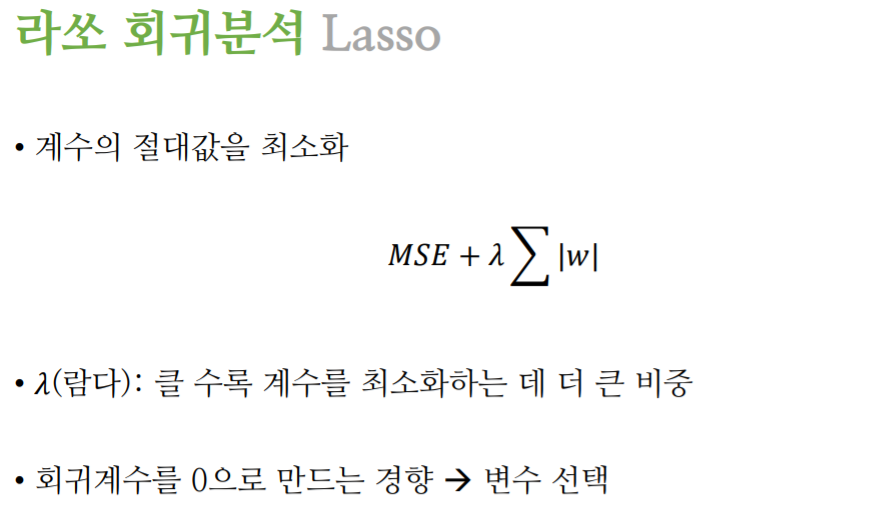

오차와 계수 모두 최소화

회귀 계수가 0이 되는 경우가 있음 -> 해석이 심플해짐 

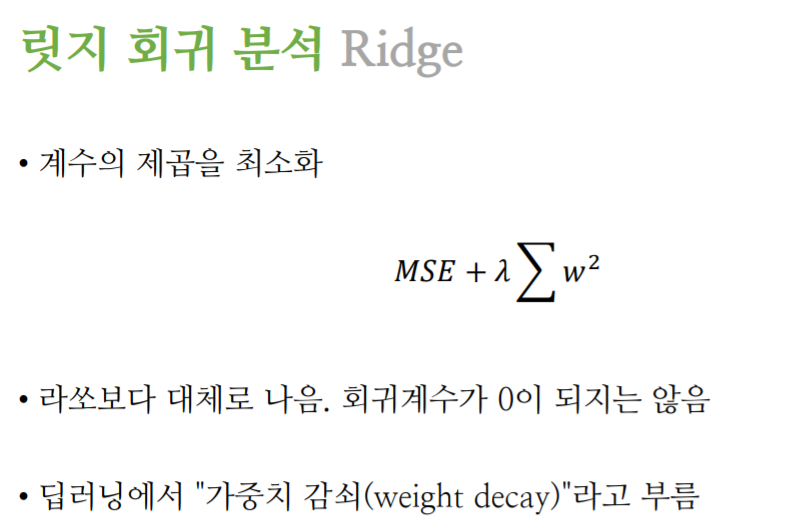

릿지로 돌려야 예측 성능 면에서 더 우수함 

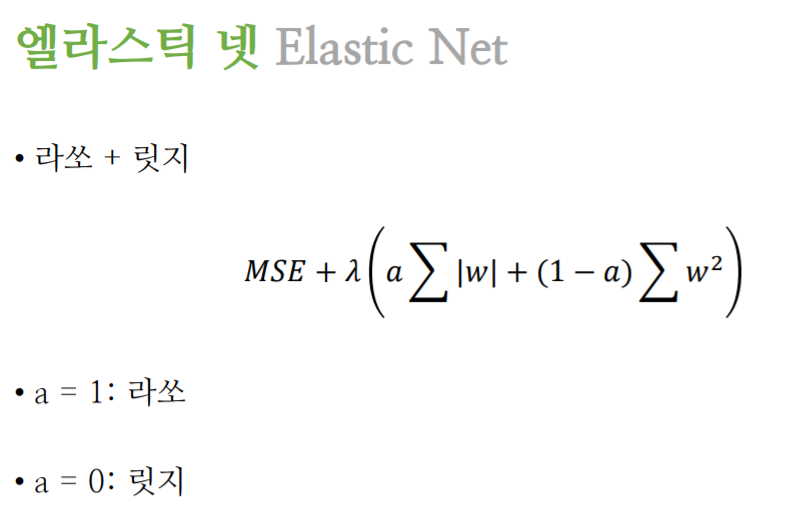

라쏘와 릿지를 합한 방법

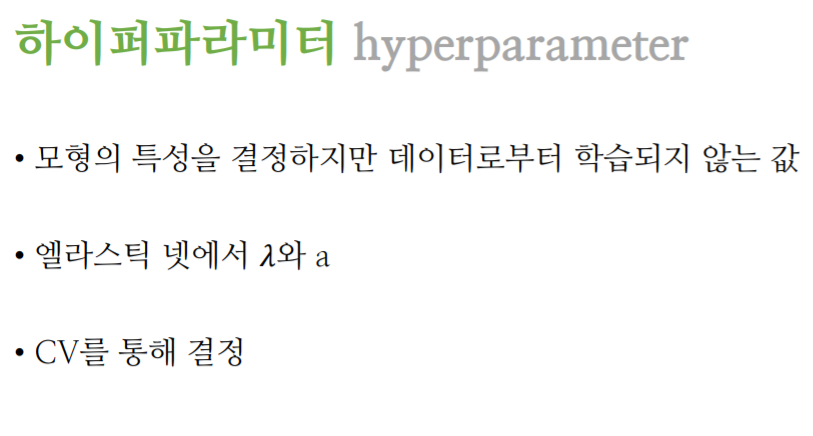

In [10]:
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [11]:
x = child.iloc[:, 1:6] #1번열부터 6번열까지를 x 
y = child['Aggression'] #Aggressiong 열은 y 

### 선형 모형

In [13]:
m1 = LinearRegression()
m1.fit(x,y)
m1.coef_

array([ 0.03291628,  0.14216117,  0.08168417, -0.10905412,  0.0566481 ])

### 엘라스틱넷 + 교차검증
l1_ratio: 교안에서 a, 라쏘(L1), 릿지(L2)

In [15]:
m2 = ElasticNetCV(l1_ratio = [.1, .5, 1], cv = 3) # 3-fold 교차검증 
m2.fit(x,y)
m2.coef_

array([ 0.02572348,  0.12471677,  0.0687051 , -0.08714782,  0.05652955])

In [17]:
m2.l1_ratio_

0.1

In [18]:
m2.alpha_ #교안에서 람다에 해당하는 부분 

0.008882602491363027

# 더미코딩

In [20]:
hsb = pd.read_csv('hsb2.csv')

In [22]:
hsb.head() #ses -> Socio-Economic Status 사회경제 수준

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [23]:
ols('read~C(race)', hsb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.964
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000654
Time:                        14:41:42   Log-Likelihood:                -740.06
No. Observations:                 200   AIC:                             1488.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.6667      2.019     23.117      0.000      42.685      50.648
C(race)[T.2]     5.2424      3.601      1.456      0.147      -1.859      12.344
C(race)[T.3]     0.1333      2.994      0.045      0.965      -5.772       6.038
C(race)[T.4]     7.2575      2.179      3.330      0.001       2.959      11.556
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.702
Skew:                           0.147   Prob(JB):                        0.259
Kurtosis:                       2.512   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## pandas.get_dummies

In [25]:
race = pd.get_dummies(hsb['race'], prefix = 'race') # prefix: 앞에 ''라고 붙여라

In [27]:
new = pd.concat([hsb, race], axis = 1) #hsb와 dummy를 이어붙임(concat)

In [31]:
ols('read~race_2+race_3+race_4', new).fit().summary() #기준이 race_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.964
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000654
Time:                        14:58:37   Log-Likelihood:                -740.06
No. Observations:                 200   AIC:                             1488.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.6667      2.019     23.117      0.000      42.685      50.648
race_2         5.2424      3.601      1.456      0.147      -1.859      12.344
race_3         0.1333      2.994      0.045      0.965      -5.772       6.038
race_4         7.2575      2.179      3.330      0.001       2.959      11.556
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.702
Skew:                           0.147   Prob(JB):                        0.259
Kurtosis:                       2.512   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### .replace로 컬럼값 바꾸기

In [38]:
hsb['race2']= hsb['race'].replace({1: '_흑', 2:'백', 3:'황', 4:'기타'})

In [39]:
ols('read~C(race2)', hsb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.964
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000654
Time:                        15:10:56   Log-Likelihood:                -740.06
No. Observations:                 200   AIC:                             1488.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         46.6667      2.019     23.117      0.000      42.685      50.648
C(race2)[T.기타]     7.2575      2.179      3.330      0.001       2.959      11.556
C(race2)[T.백]      5.2424      3.601      1.456      0.147      -1.859      12.344
C(race2)[T.황]      0.1333      2.994      0.045      0.965      -5.772       6.038
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.702
Skew:                           0.147   Prob(JB):                        0.259
Kurtosis:                       2.512   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,race2
0,70,0,4,1,1,1,57,52,41,47,57,기타
1,121,1,4,2,1,3,68,59,53,63,61,기타
2,86,0,4,3,1,1,44,33,54,58,31,기타
3,141,0,4,3,1,3,63,44,47,53,56,기타
4,172,0,4,2,1,2,47,52,57,53,61,기타


In [41]:
ols('read~ses', hsb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     18.64
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.49e-05
Time:                        15:46:44   Log-Likelihood:                -739.80
No. Observations:                 200   AIC:                             1484.
Df Residuals:                     198   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6972      2.095     20.858      0.000      39.566      47.829
ses            4.1522      0.962      4.317      0.000       2.256       6.049
==============================================================================
Omnibus:                        6.283   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.593
Skew:                           0.104   Prob(JB):                        0.166
Kurtosis:                       2.377   Cond. No.                         7.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
hsb['schtyp2'] = hsb['schtyp']-1

In [44]:
ols('read~ses+schtyp2', hsb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.529
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000112
Time:                        15:48:56   Log-Likelihood:                -739.57
No. Observations:                 200   AIC:                             1485.
Df Residuals:                     197   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6743      2.098     20.816      0.000      39.537      47.812
ses            4.0613      0.972      4.178      0.000       2.144       5.979
schtyp2        1.3109      1.916      0.684      0.495      -2.467       5.089
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.633
Skew:                           0.115   Prob(JB):                        0.163
Kurtosis:                       2.381   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
ols('write~ses+ses:female+female', hsb).fit().summary() #ses:schtyp2 -> 상호작용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     9.256
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           9.38e-06
Time:                        16:17:34   Log-Likelihood:                -719.84
No. Observations:                 200   AIC:                             1448.
Df Residuals:                     196   BIC:                             1461.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3109      3.120     13.881      0.000      37.157      49.464
ses            3.1618      1.382      2.288      0.023       0.437       5.887
ses:female     0.0388      1.795      0.022      0.983      -3.501       3.578
female         5.3668      3.946      1.360      0.175      -2.415      13.149
==============================================================================
Omnibus:                       11.529   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.780
Skew:                          -0.349   Prob(JB):                       0.0205
Kurtosis:                       2.332   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
ols('write~female*read', hsb).fit().summary() # 'write~read+female+read:female' = 'write~female*read'며

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     28.51
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.54e-07
Time:                        16:34:44   Log-Likelihood:                -719.64
No. Observations:                 200   AIC:                             1443.
Df Residuals:                     198   BIC:                             1450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      49.2461      0.912     54.008      0.000      47.448      51.044
female:read     0.1252      0.023      5.340      0.000       0.079       0.171
==============================================================================
Omnibus:                       10.244   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.949
Skew:                          -0.245   Prob(JB):                       0.0511
Kurtosis:                       2.312   Cond. No.                         56.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""